# SDialog dependencies

In [1]:
# Setup the environment depending on weather we are running in Google Colab or Jupyter Notebook
import os
from IPython import get_ipython

if "google.colab" in str(get_ipython()):
    print("Running on CoLab")

    # Installing Ollama (if you are not planning to use Ollama, you can just comment these lines to speed up the installation)
    !curl -fsSL https://ollama.com/install.sh | sh

    # Installing sdialog
    !git clone https://github.com/qanastek/sdialog.git
    %cd sdialog
    %pip install -e .
    %cd ..
else:
    print("Running in Jupyter Notebook")
    # Little hack to avoid the "OSError: Background processes not supported." error in Jupyter notebooks"
    get_ipython().system = os.system

Running in Jupyter Notebook


## Locally

Create a `.venv` using the root `requirement.txt` file and Python `3.11.14`

# Tutorial 12: Room generation

## Medical room generator

In [2]:
from sdialog.audio.jsalt import MedicalRoomGenerator, RoomRole

/Users/yanislabrak/Desktop/HUB/PostJSALT/sdialog/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
generator = MedicalRoomGenerator()
room = generator.generate({"room_type": RoomRole.CONSULTATION})
print(room)
room = generator.generate({"room_type": RoomRole.EXAMINATION})
print(room)
room = generator.generate({"room_type": RoomRole.TREATMENT})
print(room)
room = generator.generate({"room_type": RoomRole.PATIENT_ROOM})
print(room)
room = generator.generate({"room_type": RoomRole.SURGERY})
print(room)
room = generator.generate({"room_type": RoomRole.WAITING})
print(room)
room = generator.generate({"room_type": RoomRole.EMERGENCY})
print(room)
room = generator.generate({"room_type": RoomRole.OFFICE})
print(room)
print(room.get_square_meters())
print(room.get_volume())

1760443366730153000:  consultation_room - 1760443366730115000, desc: consultation room - 1760443366730115000 (dimentions: dim: [2.598076211353316, 1.7320508075688772, 2.5], reverberation_time_ratio: Nonematerials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wooden_lining'> floor=<FloorMaterial.CARPET_HAIRY: 'carpet_hairy'>)
1760443366730277000:  examination_room - 1760443366730266000, desc: examination room - 1760443366730266000 (dimentions: dim: [3.0, 2.0, 2.5], reverberation_time_ratio: Nonematerials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wooden_lining'> floor=<FloorMaterial.CARPET_HAIRY: 'carpet_hairy'>)
1760443366730341000:  treatment_room - 1760443366730332000, desc: treatment room - 1760443366730332000 (dimentions: dim: [3.577708763999664, 2.23606797749979, 2.5], reverberation_time_ratio: Nonematerials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre

## Basic room generator

In [4]:
from sdialog.audio.room_generator import BasicRoomGenerator

# With seed
generator = BasicRoomGenerator()
room = generator.generate({"room_size": 8})
print(room)

# Without seed
generator = BasicRoomGenerator(seed=123)
room = generator.generate({"room_size": 8})
print(room)
room = generator.generate({"room_size": 20})
print(room)

1760443366734083000:  room_1760443366734072000, desc: room_1760443366734073000 (dimentions: dim: [2.8284271247461903, 2.8284271247461903, 2.5], reverberation_time_ratio: Nonematerials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wooden_lining'> floor=<FloorMaterial.CARPET_HAIRY: 'carpet_hairy'>)
1760443366734206000:  room_1760443366734203000, desc: room_1760443366734203000 (dimentions: dim: [2.8284271247461903, 2.8284271247461903, 2.5], reverberation_time_ratio: Nonematerials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wooden_lining'> floor=<FloorMaterial.CARPET_HAIRY: 'carpet_hairy'>)
1760443366734330000:  room_1760443366734324000, desc: room_1760443366734324000 (dimentions: dim: [4.47213595499958, 4.47213595499958, 2.5], reverberation_time_ratio: Nonematerials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wood

Show the square meters ($m^2$) and volume ($m^3$) of the room

In [5]:
print(int(room.get_square_meters()), "m²")
print(int(room.get_volume()), "m³")

20 m²
50 m³


## Vizualization of the room

In [6]:
img = room.to_image(
    show_anchors=True,
    show_walls=True,
    show_furnitures=True,
    show_speakers=True,
    show_microphones=True
)

Print the image of the room

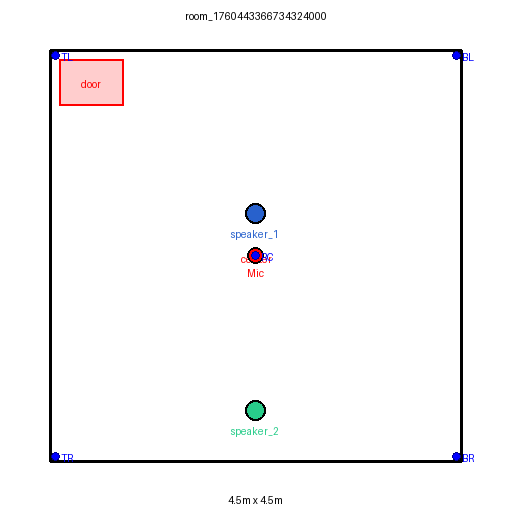

In [7]:
display(img)

or save the image locally

In [8]:
img.save("room.png")

You can also adjust what information from the room you want to display by switching `show_XXX` parameters to `False` like `show_furnitures=False` or `show_microphones=False`

## Custom room generator

In [9]:
import math
import time
import random
from sdialog.audio.room import Room
from typing import Tuple, Dict, Any
from sdialog.audio.audio_utils import Furniture
from sdialog.audio.room_generator import Dimensions3D, RoomGenerator

In [10]:
class CustomRoomGenerator(RoomGenerator):

    def __init__(self):
        super().__init__()

        # Standard room sizes (floor area in m²): size, reverberation_time_ratio, name, description
        self.ROOM_SIZES: Dict[str, Tuple[List[int], float, str, str]] = {
            "big_warehouse": ([1000, 2500], 0.47, "big_warehouse", "big warehouse"),
            "small_warehouse": ([100, 200, 300], 0.75, "small_warehouse", "small warehouse"),
        }

        self.ROOM_ASPECT_RATIOS = {
            100: (1.5, 1.0), 200: (1.5, 1.0), 300: (1.6, 1.0),
            1000: (1.7, 1.0), 2500: (1.8, 1.0),
        }

    def calculate_room_dimensions(self, floor_area: float, aspect_ratio: Tuple[float, float]) -> Dimensions3D:
        """
        Calculate room dimensions from floor area
        floor_area: float
        aspect_ratio: Tuple[float, float]
        """

        w_ratio, l_ratio = aspect_ratio

        length = math.sqrt(floor_area / (w_ratio / l_ratio))
        width = length * (w_ratio / l_ratio)

        return Dimensions3D(width=width, length=length, height=10)

    def generate(self, args: Dict[str, Any]) -> Room:
        """
        Generate a room based on predefined warehouse setups.
        args:
            warehouse_type: str
        """

        if "warehouse_type" not in args:
            raise ValueError("warehouse_type is required")

        if len(args) > 1:
            raise ValueError("Only warehouse_type is allowed")

        floor_area, reverberation_time_ratio, name, description = self.ROOM_SIZES[args["warehouse_type"]]

        # Randomly select a floor area from the list
        floor_area = random.choice(floor_area)

        if floor_area not in self.ROOM_ASPECT_RATIOS:
            raise ValueError(f"Unsupported room size: {floor_area}m²")

        w_ratio, l_ratio = self.ROOM_ASPECT_RATIOS[floor_area]

        # Time in nanoseconds
        time_in_ns = time.time_ns()

        dims = self.calculate_room_dimensions(floor_area, (w_ratio, l_ratio))

        room = Room(
            name=f"Warehouse: {name} - {time_in_ns}",
            description=f"Warehouse: {description} - {time_in_ns}",
            dimensions=dims,
            reverberation_time_ratio=reverberation_time_ratio,
            furnitures={
                "door": Furniture(
                    name="door",
                    x=0.10,
                    y=0.10,
                    width=0.70,
                    height=2.10,
                    depth=0.5
                )
            }
        )

        return room


In [11]:
room = CustomRoomGenerator().generate({"warehouse_type": "big_warehouse"})
print(room)
print(room.get_square_meters())
print(room.get_volume())

print("-"*100)

room = CustomRoomGenerator().generate({"warehouse_type": "small_warehouse"})
print(room)
print(room.get_square_meters())
print(room.get_volume())


1760443366791044000:  Warehouse: big_warehouse - 1760443366791018000, desc: Warehouse: big warehouse - 1760443366791018000 (dimentions: dim: [41.23105625617661, 24.253562503633297, 10], reverberation_time_ratio: 0.47materials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wooden_lining'> floor=<FloorMaterial.CARPET_HAIRY: 'carpet_hairy'>)
1000.0
10000.0
----------------------------------------------------------------------------------------------------
1760443366791582000:  Warehouse: small_warehouse - 1760443366791557000, desc: Warehouse: small warehouse - 1760443366791557000 (dimentions: dim: [21.90890230020665, 13.693063937629153, 10], reverberation_time_ratio: 0.75materials: ceiling=<CeilingMaterial.FIBRE_ABSORBER: 'ceiling_fibre_absorber'> walls=<WallMaterial.WOODEN_LINING: 'wooden_lining'> floor=<FloorMaterial.CARPET_HAIRY: 'carpet_hairy'>)
300.00000000000006
3000.0000000000005


### Add furniture to a Room instance

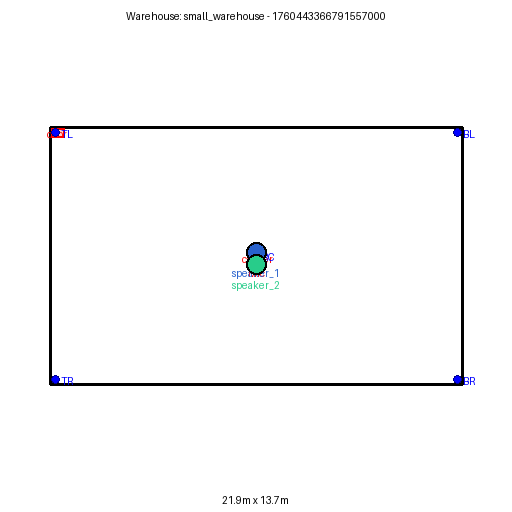

In [12]:
display(room.to_image())

Let now add a carpet in the room

In [13]:
from sdialog.audio.audio_utils import RGBAColor

In [14]:
room.add_furnitures({
    "carpet": Furniture(
        name="carpet",
        x=0.0,
        y=0.0,
        height=1.5,
        width=6.1,
        depth=4.1,
        color=RGBAColor.PURPLE
    )
})

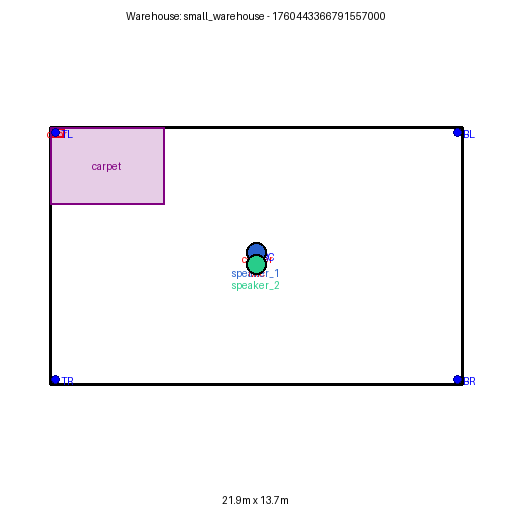

In [15]:
display(room.to_image())

## Custom microphone position

In [16]:
from sdialog.audio.room import MicrophonePosition, Position3D

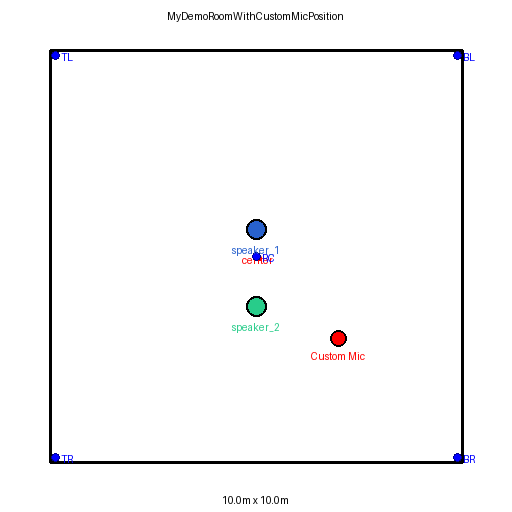

In [17]:
room = Room(
    name="MyDemoRoomWithCustomMicPosition",
    description="MyDemoRoomWithCustomMicPosition",
    dimensions=Dimensions3D(width=10, length=10, height=10),
    reverberation_time_ratio=0.5,
    mic_position=MicrophonePosition.CUSTOM,
    mic_position_3d=Position3D(x=7.0, y=7.0, z=3.0)
)
display(room.to_image())

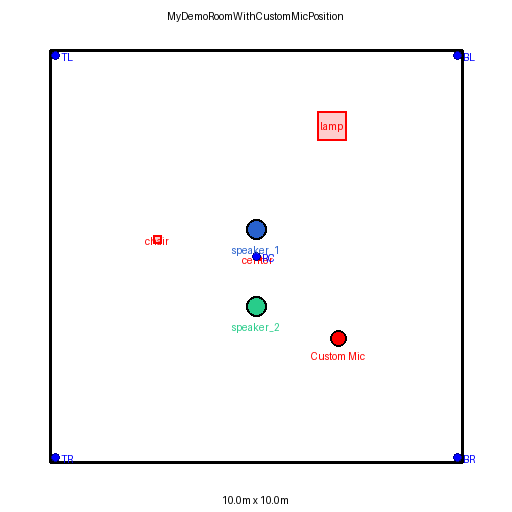

In [18]:
room.add_furnitures({
    "lamp": Furniture(
        name="lamp",
        x=6.5,
        y=1.5,
        width=0.72,
        height=1.3,
        depth=0.72
    )
})

room.add_furnitures({
    "chair": Furniture(
        name="chair",
        x=2.5,
        y=4.5,
        width=0.2,
        height=1.3,
        depth=0.2
    )
})

display(room.to_image())

Now we will bind a speaker identifier to a position

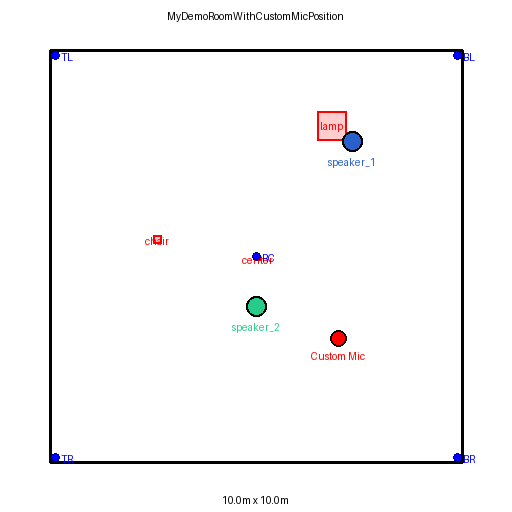

In [19]:
room.place_speaker_around_furniture(speaker_name="speaker_1", furniture_name="lamp")
display(room.to_image())

We can do the same for the speaker 2:

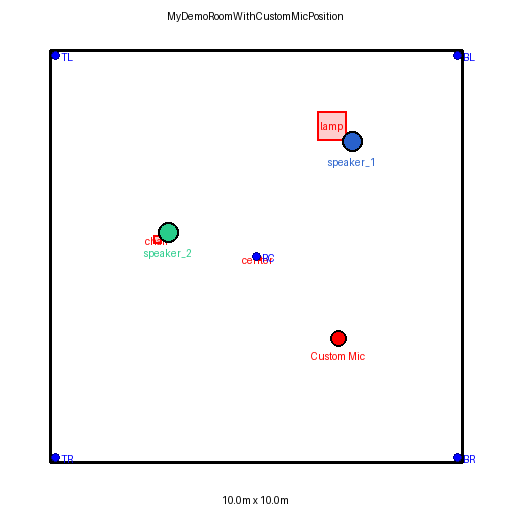

In [20]:
room.place_speaker_around_furniture(speaker_name="speaker_2", furniture_name="chair")
display(room.to_image())

We can also place the speaker close to the other one with more distance (in meters):

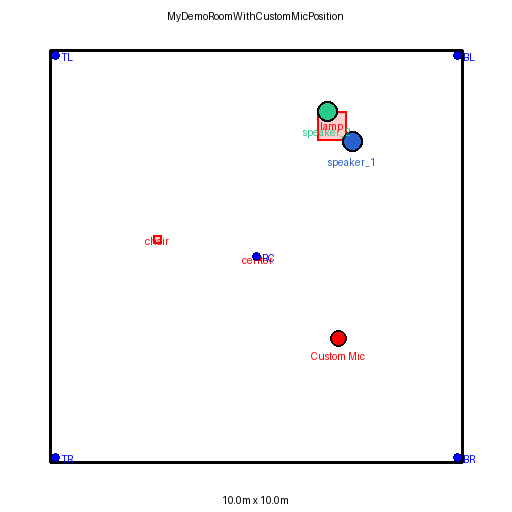

In [21]:
room.place_speaker_around_furniture(speaker_name="speaker_2", furniture_name="lamp", max_distance=0.5)
display(room.to_image())

We want to try now to place the speaker 2 on the `front` of the `lamp` at a distance of maximum `1 meter`: 

In [22]:
from sdialog.audio.audio_utils import SpeakerSide

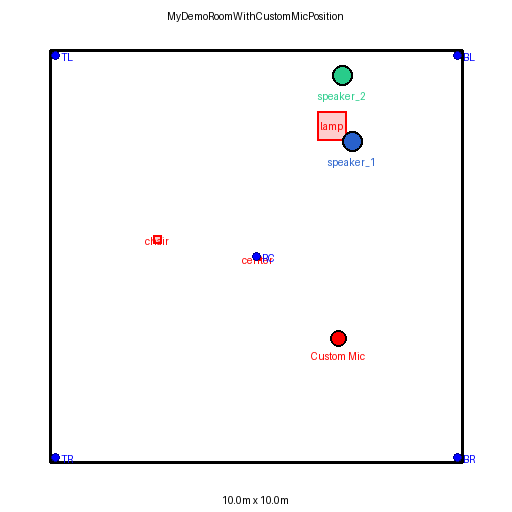

In [23]:
room.place_speaker_around_furniture(speaker_name="speaker_2", furniture_name="lamp", max_distance=10.0, side=SpeakerSide.FRONT)
display(room.to_image())

You can also bind the speaker without explicitly mentionning a furniture and it will be binded to the `center` of the room:

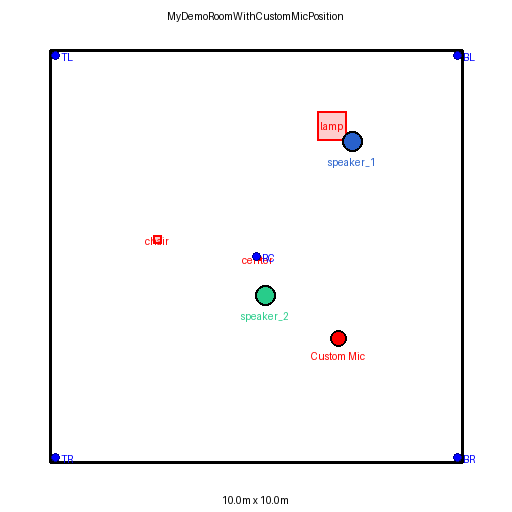

In [24]:
room.place_speaker_around_furniture(speaker_name="speaker_2", max_distance=1.0)
display(room.to_image())

You can also place the speaker manually at a predefined 3D positions:

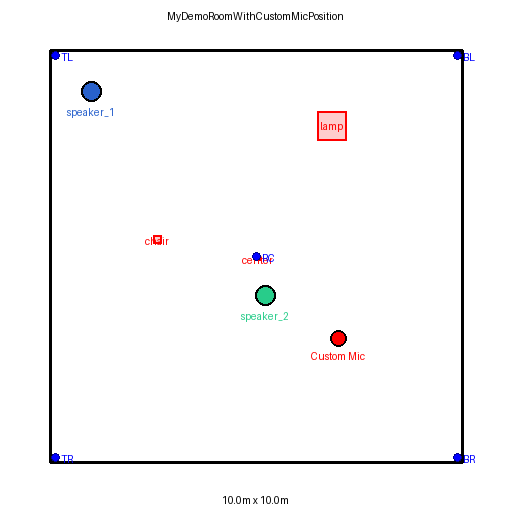

In [25]:
room.place_speaker(speaker_name="speaker_1", position=Position3D(x=1.0, y=1.0, z=1.0))
display(room.to_image())

Now we are going to compute distances between speakers and the microphone:

In [26]:
room.get_speaker_distances_to_microphone()

{<Role.SPEAKER_1: 'speaker_1'>: 8.717797887081348,
 <Role.SPEAKER_2: 'speaker_2'>: 3.5576773419466954}